# Практическая работа №1: Алгоритмы эффективного вычисления одночленов

Выполнил студент гр. 1303 Смирнов Дмитрий. Вариант №19.

## Цель работы

Сформировать знания о работе алгоритмах вычисления одночленов за
минимальное число операций, привить навык использования систем ком-
пьютерной математики для реализации алгоритмов.

## Основные теоретические положения

Рассмотрим методы вычисления одночленов за минимальное число операций, а также приведём некоторые оценки количества операций для вычисления одночленов.

Введём понятия для оценки числа операций:

$\lambda(n) = \lfloor \mathrm{lb}(n) \rfloor$ - уменьшенная на еденицу бинарная запись $n$<br>
$\nu(n)$ - вес Хэмминга для бинарной записи числа $n$ (число единиц в бинарной записи)

### Бинарный метод \"SX\"

Алгоритм для возведения в степень $n$ бинарным методом $SX$:
<ol>
<li>Представим $n$ в бинарном виде $n = (a_{m}a_{m-1} ... a_{1})_{2} = a_{m}2^{m-1} + a_{m-1}2^{m-2} + ... + a_{2}2 + a_{1} $, при том $a_{m} = 1$</li>
<li>Отбросим старший бит $a_{m}$</li>
<li>
    Делаем замену в бинарной записи $ n:$
    <center>
        $a_{i} = 1 \Rightarrow a_{i} = SX$<br>
        $a_{i} = 0 \Rightarrow a_{i} = S$
    </center>
</li>
<li>
    Вычисление:<br>
    Начинаем с $x$<br>
    Далее идём по преобразованной записи $n:$<br>
    <center>
        $a_{i} = S \Rightarrow x = x ^ 2$<br>
        $a_{i} = X \Rightarrow x = x \cdot x$
    </center>
    </li>
</ol>

Количество операций умножения при использовании бинарного метода равно: $\lambda(n) + \nu(n) - 1$
    


### Бинарный метод возведения справа налево

Метод возведения справа налево осуществляет возведение некоторого числа $x$ в степень $n$ по следующему алгоритму:
<ol>
    <li>Начинаем с $N = n, Y = 1, Z = x$</li>
    <li>Пока $N \neq 0$ вычисляем новые значения: <br>
        $\blacktriangleright$ $N = \bigg\lfloor \cfrac{N}{2} \bigg\rfloor; Z = Z \cdot Z$, если $N$ - четное<br>
        $\blacktriangleright$ $N = \bigg\lfloor \cfrac{N}{2} \bigg\rfloor; Y = Z \cdot Y$, если $N$ - нечетное<br>
    </li>
    <li>Возвращаем $Y$ и выходим из алгоритма</li>
</ol>
Количество операций умножения при использовании бинарного метода равно: $\lambda(n) + \nu(n)$

### Метод множителей
Метод множителей осуществляет возведение некоторого числа в степень согласно следующему алгоритму:
<ol>
    <li>Представим $n$ в виде разложения $n = p \cdot q$, где $p$ - наименьший простой множитель $n$, а $q > 1$. Таким образом, $x^n$ можно найти, вычислив $x^p$ и возведя эту величину в степень $q$</li>
    <li>Если $n$ - простое и $n > 1$, то $ x = x^{n-1} \cdot x$</li>
    <li>При $n = 1$ - то нашли искомое значение</li>
</ol>

### Дерево степеней
Дерево степеней строится согласно следующему алгоритму:
<ol>
    <li>На нулевом уровне в дереве только один узел - $1$. Это корень дерева</li>
    <li>$k+1$-й уровень строим так: берём каждый узел $v$ на $k$-м уровне слева направо и присоединяем узлы $v+a_{0}, v+a_{1}, ..., v+a_{k-1}$, если они ещё не присутствуют в дереве.</li>
</ol>
Таким образом дерево степеней может быть построено до требуемого уровня

## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### 1. Бинарный метод SX
Код реализующий данный метод представлен ниже

In [1]:
def methodSX(n):
    if 0 < n < 1:
        raise ValueError
    if n == 0:
        return 1
    bin_n = str(bin(n))[3:]
    n_expressedSX = bin_n.replace('1','SX').replace('0', 'S')
    answer = var('x')
    print(f"Число n представленное ввиде строки из SX:\n{n_expressedSX}")
    for i, char in enumerate(n_expressedSX):
        if char == 'S':
            answer ^= 2
        else:
            answer *= x
        print(f"{i + 1} Итерация:")
        show(answer)
    print(f"Всего операций: {len(n_expressedSX)}")
    return answer

Приведём пример работы программы на нескольких $n$, а именно $3, 17, 8$: 

In [2]:
show(methodSX(3))

Число n представленное ввиде строки из SX:
SX
1 Итерация:


x^2

2 Итерация:


x^3

Всего операций: 2


x^3

$n = 3; \lambda(n) = 1; \nu(n) = 2;$ Оценка: $\lambda(n) + \nu(n) - 1 = 2; $ Кол-во операций совпало

In [3]:
show(methodSX(17))

Число n представленное ввиде строки из SX:
SSSSX
1 Итерация:


x^2

2 Итерация:


x^4

3 Итерация:


x^8

4 Итерация:


x^16

5 Итерация:


x^17

Всего операций: 5


x^17

$ n = 17; \lambda(n) = 4; \nu(n) = 2;$ Оценка: $\lambda(n) + \nu(n) - 1 = 5; $ Кол-во операций совпало

In [4]:
show(methodSX(8))

Число n представленное ввиде строки из SX:
SSS
1 Итерация:


x^2

2 Итерация:


x^4

3 Итерация:


x^8

Всего операций: 3


x^8

$ n = 8; \lambda(n) = 3; \nu(n) = 1;$ Оценка: $\lambda(n) + \nu(n) - 1 = 3; $ Кол-во операций совпало

#### Вывод
Реализован бинарный метод SX, корректность алгоритма проверена на тестах. Метод действительно быстрее возводит число в степень, чем последовательное возведение. Чем больше едениц в бинарной записи числа, тем больше операций алгоритм делает.

### 2. Метод возведения справа налево
Код реализующий данный метод представлен ниже

In [5]:
def methodRL(n):
    N = n
    Y = 1
    Z = var('x')
    i = 0
    
    print("| № | N | Y | Z |")
    print("|:--:|:--:|:--:|:--:|")
    print(f"| {i} | {N} | {Y} | {Z} |")
    
    while N != 0:
        if N % 2 != 0:
            Y *= Z
        N //= 2 
        Z ^= 2
        i += 1
        print(f"| {i} | {N} | {Y} | {Z} |")
    return Y

Приведём пример работы программы на нескольких $n$, а именно $3, 17, 8$. Для каждого $n$ выведем результат в виде таблицы.: 

In [6]:
show(methodRL(3))

| № | N | Y | Z |
|:--:|:--:|:--:|:--:|
| 0 | 3 | 1 | x |
| 1 | 1 | x | x^2 |
| 2 | 0 | x^3 | x^4 |


x^3

| № | N | Y | Z |
|:--:|:--:|:--:|:--:|
| 0 | 3 | 1 | x |
| 1 | 1 | x | x^2 |
| 2 | 0 | x^3 | x^4 |

$n = 3; \lambda(n) = 1; \nu(n) = 2;$ Оценка: $\lambda(n) + \nu(n) = 3; $ Кол-во операций совпало

In [7]:
show(methodRL(17))

| № | N | Y | Z |
|:--:|:--:|:--:|:--:|
| 0 | 17 | 1 | x |
| 1 | 8 | x | x^2 |
| 2 | 4 | x | x^4 |
| 3 | 2 | x | x^8 |
| 4 | 1 | x | x^16 |
| 5 | 0 | x^17 | x^32 |


x^17

| № | N | Y | Z |
|:--:|:--:|:--:|:--:|
| 0 | 17 | 1 | x |
| 1 | 8 | x | x^2 |
| 2 | 4 | x | x^4 |
| 3 | 2 | x | x^8 |
| 4 | 1 | x | x^16 |
| 5 | 0 | x^17 | x^32 |

$ n = 17; \lambda(n) = 3; \nu(n) = 2;$ Оценка: $\lambda(n) + \nu(n) = 6; $ Кол-во операций совпало

In [8]:
show(methodRL(8))

| № | N | Y | Z |
|:--:|:--:|:--:|:--:|
| 0 | 8 | 1 | x |
| 1 | 4 | 1 | x^2 |
| 2 | 2 | 1 | x^4 |
| 3 | 1 | 1 | x^8 |
| 4 | 0 | x^8 | x^16 |


x^8

| № | N | Y | Z |
|:--:|:--:|:--:|:--:|
| 0 | 8 | 1 | x |
| 1 | 4 | 1 | x^2 |
| 2 | 2 | 1 | x^4 |
| 3 | 1 | 1 | x^8 |
| 4 | 0 | x^8 | x^16 |

$ n = 8; \lambda(n) = 3; \nu(n) = 1;$ Оценка: $\lambda(n) + \nu(n) = 4; $ Кол-во операций совпало

#### Вывод
Реализован бинарный метод возведения в степень справа налево. Алгоритм был проверен на 3 различных значениях. Данный метод требует на одну операцию умножения больше, чем метод $SX$.

### 3. Сравнение бинарного метода "SX" и метод возведения справа налево

Число операций в методе справа налево больше, чем в методе $SX$, это заметно по оценке. Число операций в методе справа налево оценивается как $\lambda(n) + \nu(n)$. В методе $SX$ же число операций равно $\lambda(n) + \nu(n) - 1$.
Таким образом, бинарный метод $SX$ выгоднее возведения справа налево.

### 4. Метод множителей

Выполним метод множителей вручную для $n = 3, 17, 8$ по алгоритму, приведённому в теоретическом положении.<br>

#### Метод множителей для n = 3:
$x; x \cdot x =  x^2; x \cdot x^2 = x^3$ <br>
Всего 2 операции

#### Метод множителей для n = 17
$x^{17} = x \cdot x^{16}$ <br>
$x^{17} = x \cdot (x^8)^2$ <br>
$x^{17} = x \cdot ((x^4)^2)^2$ <br>
$x^{17} = x \cdot (((x^2)^2)^2)^2$ <br>
Итого 5 операций.

#### Метод множителей для n = 8
$x^8 = (x^4)^2$<br>
$x^8 = ((x^2)^2)^2$ <br>
Итого 3 операций.

#### Вывод
Рассмотрен метод множителей для нескольких $n$. Его преимущество заключается в наглядности и простоте идеи. <br> Метод множителей в некоторых случаях может быть как быстрее, так и равен методу "$SX$". 

### 5. Построение дерева степеней

Реализуем алгоритм построения дерева степеней до $k$-го уровня: <br>
Дерево будем хранить в виде словаря, где ключами будут являться степени(узлы), а значениями - список из "родителей" данной вершины.

In [9]:
def treeBuilder(k):
    tree = {1:[1]}
    currentVertices = [1]
    for _ in range(k):
        tmpVertices = []
        for vertex in currentVertices:
            for parent in tree[vertex]:
                tmpVertex = vertex+parent
                if tmpVertex not in tree:
                    tmpVertices.append(tmpVertex)
                    tree[tmpVertex] = tree[vertex]+[tmpVertex]
        currentVertices = tmpVertices
    return tree

In [10]:
def printTree(tree, path=None):
    tmpTree = tree.copy()
    tmpTree.pop(1)
    printableTree = {}
    for vertex, parents in tmpTree.items():
        if not printableTree.get(parents[-2]):
            printableTree[parents[-2]] = [vertex]
        else:
            printableTree[parents[-2]].append(vertex)
    graph = Graph(printableTree)
    plt = graph.plot(layout='tree', tree_root=1, vertex_color='magenta', vertex_colors={"yellow": tree[path]} if path else {})
    plt.show()

Построим дерево до 4-го уровня:

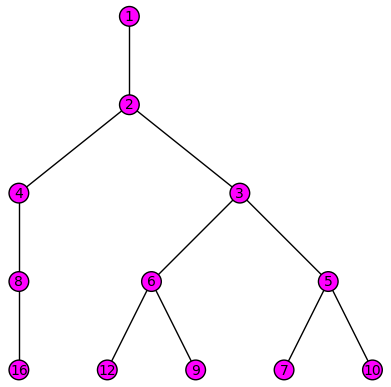

In [11]:
printTree(treeBuilder(4))

Для того, чтобы сравнить данный метод с методами, описанными выше, протестируем его для значений $n = 3, 17, 8$.

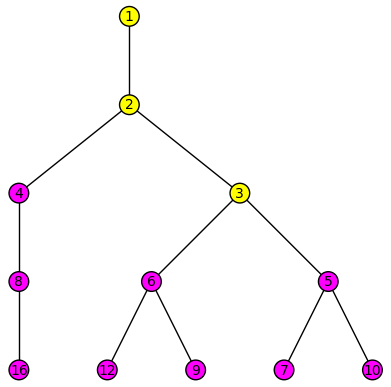

In [12]:
printTree(treeBuilder(4), 3)

Цепочка имеет вид: $x, x^2, x^3$ Количество операций 2.

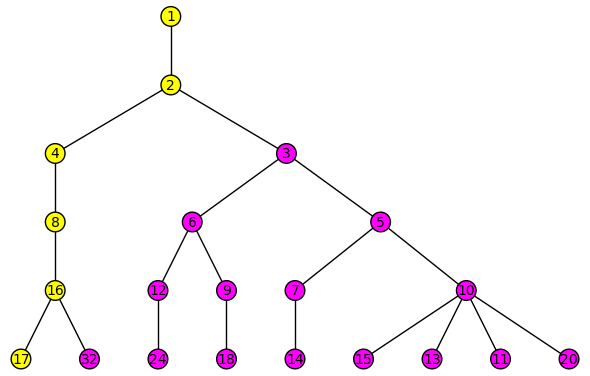

In [13]:
printTree(treeBuilder(5), 17)

Цепочка имеет вид: $x, x^2, x^4, x^8, x^{16}, x^{17}$. Количество операций 5.

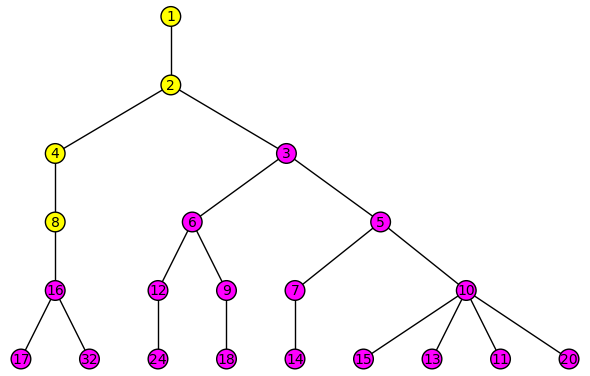

In [14]:
printTree(treeBuilder(5), 8)

Цепочка имеет вид: $x, x^2, x^4, x^8$. Количество операций 3.

#### Вывод
Реализовано дерево степеней. Было выявлено, что данный метод не медленнее метода "$SX$" и метода множителей.

## Выводы
Cформированы знания о работе алгоритмов вычисления мономов за минимальное число операций, привит навык использования систем компьютерной математики для реализации алгоритмов.
Реализован бинарный метод $SX$, метод возведения в степень справа налево, рассмотрен метод множителей и реализовано "дерево степеней". Алгоритмы проверены на работоспособность, произведено сравнение с теоретическими положениями.<br>